#Importing The Dependencies

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.utils import resample #The `resample` function is often used for resampling techniques, such as bootstrapping or undersampling/oversampling data for dealing with imbalanced datasets.
from sklearn.model_selection import train_test_split,GridSearchCV,cross_val_score #`GridSearchCV` is a technique for hyperparameter tuning, which helps you find the best settings for your machine learning model.
#  `cross_val_score` is used for cross-validation, a technique to assess the performance of your model on unseen data.
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score #`classification_report` provides a summary of key classification metrics like precision, recall, and F1-score.
# `confusion_matrix` shows a table summarizing the results of your classification predictions.
import pickle #it allows you to save Python objects (like trained machine learning models) to a file and load them back later.

#Data Collection And Processing

In [2]:
#load the dataset into pandas dataframe
data=pd.read_csv('/content/Rainfall.csv')

In [3]:
data.shape

(366, 12)

In [4]:
data.head()

,day,pressure,maxtemp,temparature,mintemp,dewpoint,humidity,cloud,rainfall,sunshine,winddirection,windspeed
0,1,1025.9,19.9,18.3,16.8,13.1,72,49,yes,9.3,80.0,26.3
1,2,1022.0,21.7,18.9,17.2,15.6,81,83,yes,0.6,50.0,15.3
2,3,1019.7,20.3,19.3,18.0,18.4,95,91,yes,0.0,40.0,14.2
3,4,1018.9,22.3,20.6,19.1,18.8,90,88,yes,1.0,50.0,16.9
4,5,1015.9,21.3,20.7,20.2,19.9,95,81,yes,0.0,40.0,13.7


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 366 entries, 0 to 365
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   day                     366 non-null    int64  
 1   pressure                366 non-null    float64
 2   maxtemp                 366 non-null    float64
 3   temparature             366 non-null    float64
 4   mintemp                 366 non-null    float64
 5   dewpoint                366 non-null    float64
 6   humidity                366 non-null    int64  
 7   cloud                   366 non-null    int64  
 8   rainfall                366 non-null    object 
 9   sunshine                366 non-null    float64
 10           winddirection  365 non-null    float64
 11  windspeed               365 non-null    float64
dtypes: float64(8), int64(3), object(1)
memory usage: 34.4+ KB


In [6]:
# remove extra white spaces from columns names
data.columns=data.columns.str.strip()

In [7]:
data.columns

Index(['day', 'pressure', 'maxtemp', 'temparature', 'mintemp', 'dewpoint',
       'humidity', 'cloud', 'rainfall', 'sunshine', 'winddirection',
       'windspeed'],
      dtype='object')

In [8]:
#remove the day column
data.drop(columns=['day'],inplace=True)

In [9]:
data.head()

,pressure,maxtemp,temparature,mintemp,dewpoint,humidity,cloud,rainfall,sunshine,winddirection,windspeed
0,1025.9,19.9,18.3,16.8,13.1,72,49,yes,9.3,80.0,26.3
1,1022.0,21.7,18.9,17.2,15.6,81,83,yes,0.6,50.0,15.3
2,1019.7,20.3,19.3,18.0,18.4,95,91,yes,0.0,40.0,14.2
3,1018.9,22.3,20.6,19.1,18.8,90,88,yes,1.0,50.0,16.9
4,1015.9,21.3,20.7,20.2,19.9,95,81,yes,0.0,40.0,13.7


In [10]:
data.isnull().sum()

,0
pressure,0
maxtemp,0
temparature,0
mintemp,0
dewpoint,0
humidity,0
cloud,0
rainfall,0
sunshine,0
winddirection,1


In [11]:
#handling the missing values
data['winddirection']=data['winddirection'].fillna(data['winddirection'].mode()[0])
data['windspeed']=data['windspeed'].fillna(data['windspeed'].median())

In [12]:
data.isnull().sum()

,0
pressure,0
maxtemp,0
temparature,0
mintemp,0
dewpoint,0
humidity,0
cloud,0
rainfall,0
sunshine,0
winddirection,0


In [13]:
#replacing the yes and no values with 1 & 0 respectively in rainfall column
data['rainfall']=data['rainfall'].replace({'yes':1,'no':0})

<ipython-input-13-7e2c231f356f>:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data['rainfall']=data['rainfall'].replace({'yes':1,'no':0})


In [15]:
data.tail()

,pressure,maxtemp,temparature,mintemp,dewpoint,humidity,cloud,rainfall,sunshine,winddirection,windspeed
361,1022.7,18.8,17.7,16.9,15.0,84,90,1,0.0,30.0,18.4
362,1026.6,18.6,17.3,16.3,12.8,75,85,1,1.0,20.0,25.9
363,1025.9,18.9,17.7,16.4,13.3,75,78,1,4.6,70.0,33.4
364,1025.3,19.2,17.3,15.2,13.3,78,86,1,1.2,20.0,20.9
365,1026.4,20.5,17.8,15.5,13.0,74,66,0,5.7,20.0,23.3


#Exploratory Data Analysis

In [16]:
#setting the plot style for all the plots
sns.set(style='whitegrid')

In [17]:
data.describe()

,pressure,maxtemp,temparature,mintemp,dewpoint,humidity,cloud,rainfall,sunshine,winddirection,windspeed
count,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000
mean,1013.742623,26.191257,23.747268,21.894536,19.989071,80.177596,71.128415,0.680328,4.419399,101.284153,21.534153
std,6.414776,5.978343,5.632813,5.594153,5.997021,10.062470,21.798012,0.466988,3.934398,81.722827,10.056054
min,998.500000,7.100000,4.900000,3.100000,-0.400000,36.000000,0.000000,0.000000,0.000000,10.000000,4.400000
25%,1008.500000,21.200000,18.825000,17.125000,16.125000,75.000000,58.000000,0.000000,0.500000,40.000000,13.725000
50%,1013.000000,27.750000,25.450000,23.700000,21.950000,80.500000,80.000000,1.000000,3.500000,70.000000,20.500000
75%,1018.100000,31.200000,28.600000,26.575000,25.000000,87.000000,88.000000,1.000000,8.200000,190.000000,27.825000
max,1034.600000,36.300000,32.400000,30.000000,26.700000,98.000000,100.000000,1.000000,12.100000,350.000000,59.500000


In [18]:
data.columns

Index(['pressure', 'maxtemp', 'temparature', 'mintemp', 'dewpoint', 'humidity',
       'cloud', 'rainfall', 'sunshine', 'winddirection', 'windspeed'],
      dtype='object')

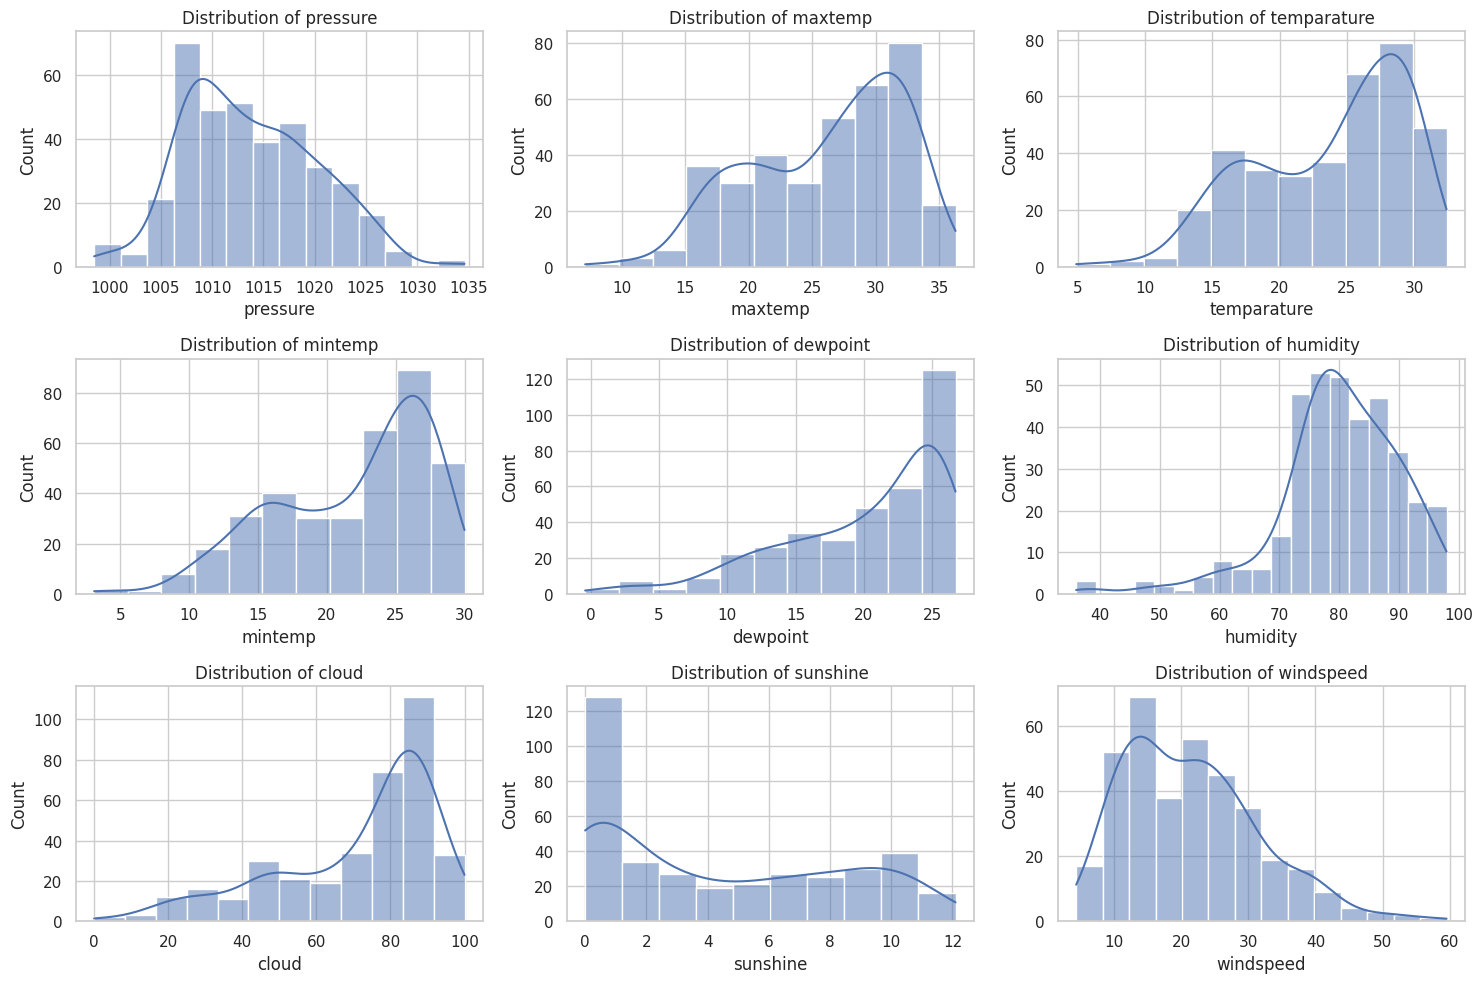

In [19]:
plt.figure(figsize=(15,10))

for i,column in enumerate(['pressure', 'maxtemp', 'temparature', 'mintemp', 'dewpoint', 'humidity', 'cloud', 'sunshine', 'windspeed'],1):
  plt.subplot(3,3,i)
  sns.histplot(data[column],kde=True)
  plt.title(f"Distribution of {column}")

plt.tight_layout()
plt.show()

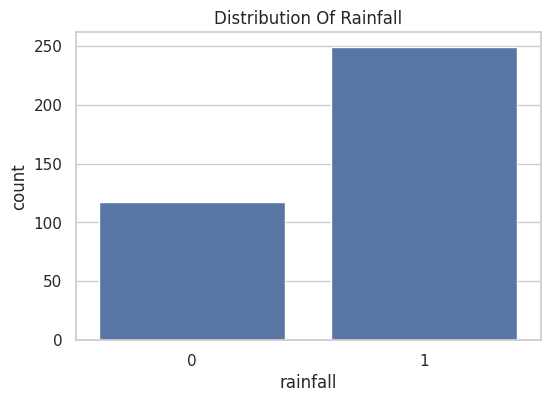

In [21]:
plt.figure(figsize=(6,4))
sns.countplot(x='rainfall',data=data)
plt.title('Distribution Of Rainfall')
plt.show()

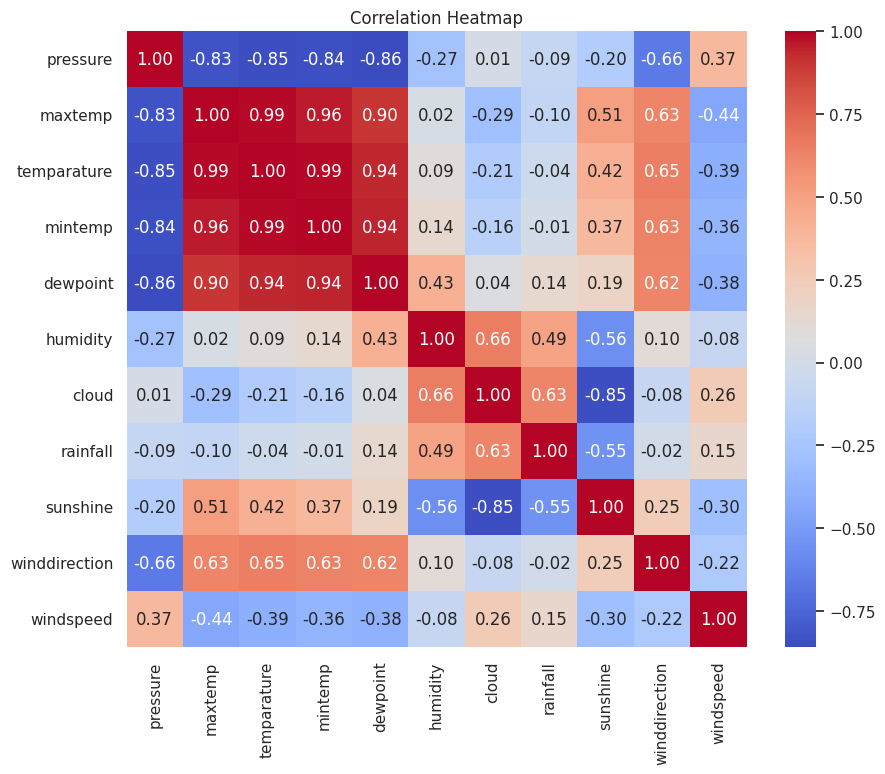

In [22]:
#correlation matrix
plt.figure(figsize=(10,8))
sns.heatmap(data.corr(),annot=True,cmap='coolwarm',fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

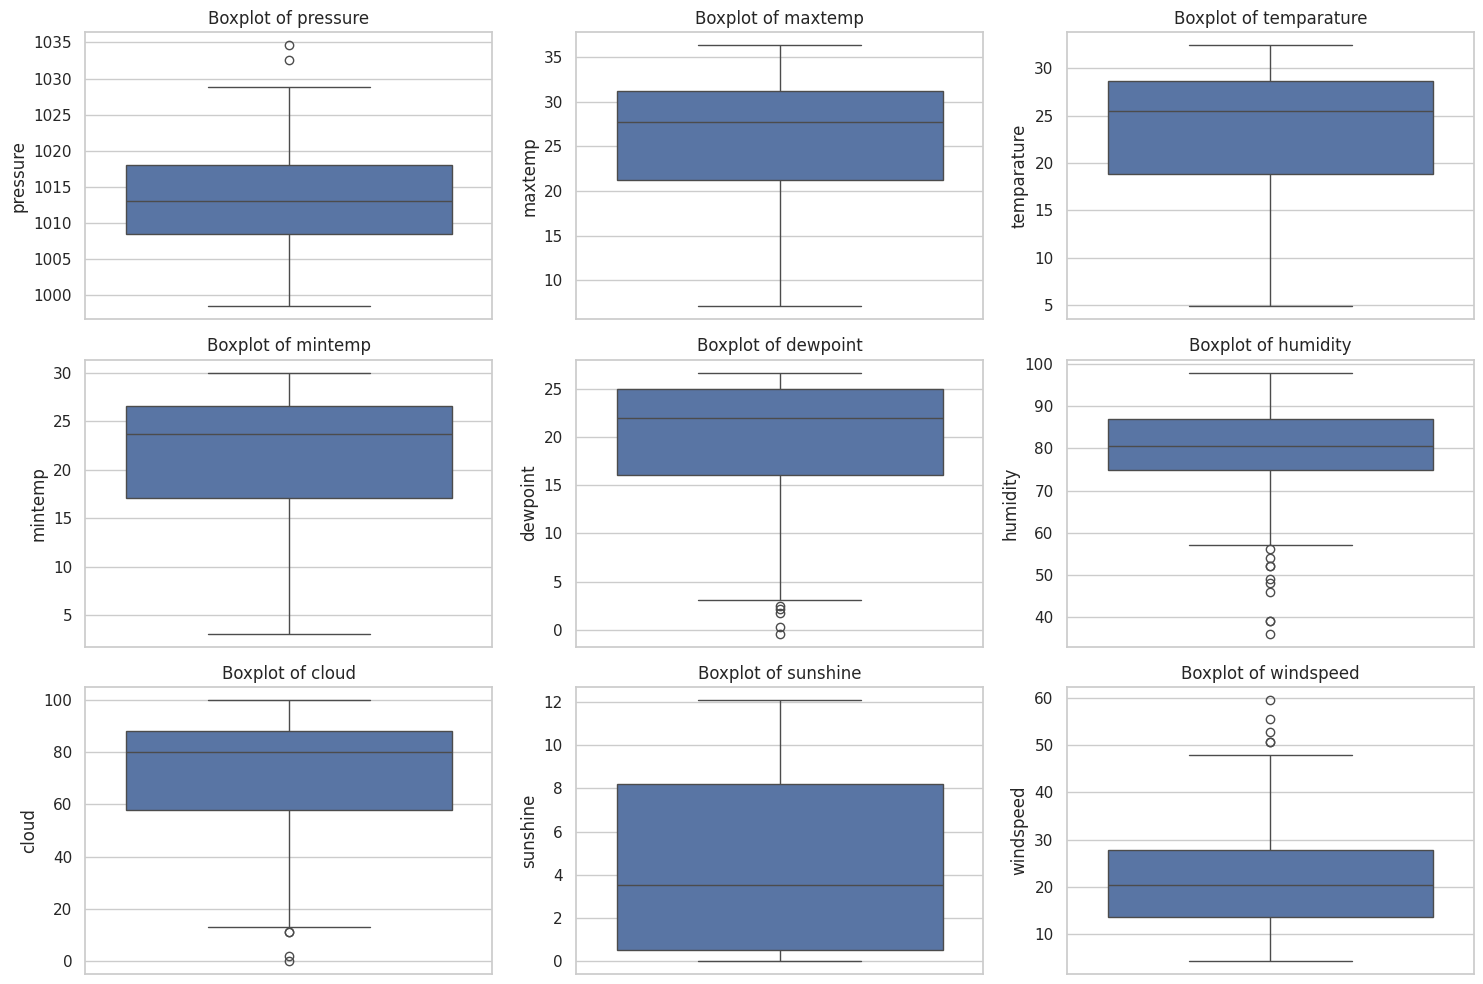

In [25]:
plt.figure(figsize=(15,10))

for i,column in enumerate(['pressure', 'maxtemp', 'temparature', 'mintemp', 'dewpoint', 'humidity', 'cloud', 'sunshine', 'windspeed'],1):
  plt.subplot(3,3,i)
  sns.boxplot(data[column])
  plt.title(f"Boxplot of {column}")

plt.tight_layout()
plt.show()

#Data Preprocessing

In [26]:
data.drop(columns=['maxtemp', 'temparature', 'mintemp'],inplace=True)

In [27]:
data.head()

,pressure,dewpoint,humidity,cloud,rainfall,sunshine,winddirection,windspeed
0,1025.9,13.1,72,49,1,9.3,80.0,26.3
1,1022.0,15.6,81,83,1,0.6,50.0,15.3
2,1019.7,18.4,95,91,1,0.0,40.0,14.2
3,1018.9,18.8,90,88,1,1.0,50.0,16.9
4,1015.9,19.9,95,81,1,0.0,40.0,13.7


In [28]:
data['rainfall'].value_counts()

,count
rainfall,
1,249
0,117


In [29]:
#separating the majority and minority class
df_majority=data[data['rainfall']==1]
df_minority=data[data['rainfall']==0]

In [30]:
#downsample majority class to match minority count
df_majority_downsampled=resample(df_majority,replace=False,n_samples=len(df_minority),random_state=42)

In [31]:
 #concatenate the both df_majority_downsampled column and df_minority column
 df_downsampled=pd.concat([df_majority_downsampled,df_minority])

In [32]:
df_downsampled.shape

(234, 8)

In [33]:
#shuffle the final dataframe
df_downsampled = df_downsampled.sample(frac=1,random_state=42).reset_index(drop=True)

In [35]:
df_downsampled.head()

,pressure,dewpoint,humidity,cloud,rainfall,sunshine,winddirection,windspeed
0,1022.2,14.1,78,90,1,0.0,30.0,28.5
1,1013.4,19.5,69,17,0,10.5,70.0,12.4
2,1006.1,24.4,74,27,0,10.8,220.0,8.7
3,1007.6,24.8,85,84,1,1.8,70.0,34.8
4,1021.2,8.4,66,18,0,10.1,20.0,24.4


In [36]:
#splitting the features and label column
x=df_downsampled.drop(columns=['rainfall'])
y=df_downsampled['rainfall']


In [37]:
#splitting the data into training and test data
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

#Model Training

In [40]:
rf_model=RandomForestClassifier(random_state=42)

param_grid_rf= {
    "n_estimators":[50,100,200],
    "max_features":["sqrt","log2"],
    "max_depth":[None,10,20,30],
    "min_samples_split":[2,5,10],
    "min_samples_leaf":[1,2,4]
}

In [41]:
#Hypertuning using GridSearchCV
grid_search_rf=GridSearchCV(estimator=rf_model,param_grid=param_grid_rf,cv=5,n_jobs=-1,verbose=2)
grid_search_rf.fit(x_train,y_train)

Fitting 5 folds for each of 216 candidates, totalling 1080 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [None, 10, 20, 30],
                         'max_features': ['sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 100, 200]},
             verbose=2)

In [42]:
best_rf_model=grid_search_rf.best_estimator_
print("Best parameters for Random Forest:", grid_search_rf.best_params_)

Best parameters for Random Forest: {'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 50}


#Model Evaluation

In [43]:
cv_scores=cross_val_score(best_rf_model,x_train,y_train,cv=5)
print("Cross-Validation Scores:", cv_scores)
print("Mean cross-validation score:", np.mean(cv_scores))

Cross-Validation Scores: [0.68421053 0.81578947 0.83783784 0.83783784 0.91891892]
Mean cross-validation score: 0.818918918918919


In [44]:
#test set performance
y_pred=best_rf_model.predict(x_test)

print("Test set Accuracy:", accuracy_score(y_test,y_pred))
print("Test set Confusion Matrix:\n", confusion_matrix(y_test,y_pred))
print("Classification Report:\n", classification_report(y_test,y_pred))

Test set Accuracy: 0.7446808510638298
Test set Confusion Matrix:
 [[17  7]
 [ 5 18]]
Classification Report:
               precision    recall  f1-score   support

           0       0.77      0.71      0.74        24
           1       0.72      0.78      0.75        23

    accuracy                           0.74        47
   macro avg       0.75      0.75      0.74        47
weighted avg       0.75      0.74      0.74        47



#Prediction On Unknown Data

In [45]:
input_data=(1015.9,19.9,95,81,0.0,40.0,13.7)

input_df=pd.DataFrame([input_data],columns=['pressure','dewpoint','humidity','cloud','sunshine','winddirection','windspeed'])

prediction=best_rf_model.predict(input_df)
print("Prediction Result:", "Rainfall" if prediction[0]==1 else "No Rainfall")

Prediction Result: Rainfall


In [46]:
#save model and feature names to a pickle file
model_data={"model": best_rf_model, "feature_names": x.columns.tolist()}

with open("rainfall_prediction_model.pkl", "wb") as file:
  pickle.dump(model_data, file)

#Load the saved model and file and use it for prediction

In [47]:
import pickle
import pandas as pd

In [48]:
with open("rainfall_prediction_model.pkl", "rb") as file:
  model_data=pickle.load(file)


In [49]:
model=model_data["model"]
feature_names=model_data["feature_names"]

In [50]:
input_data=(1015.9,19.9,95,81,0.0,40.0,13.7)

input_df=pd.DataFrame([input_data],columns=feature_names)

In [51]:
prediction=best_rf_model.predict(input_df)
print("Prediction Result:", "Rainfall" if prediction[0]==1 else "No Rainfall")

Prediction Result: Rainfall
